In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib
from esda.moran import Moran
from libpysal.weights import KNN
import libpysal
import geopandas 
from fcmeans import FCM 

In [2]:
# import datasets 
tur = pd.read_csv("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\turkana_AB_w_NDVI.csv")
nar = pd.read_csv("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\narok_AB_w_NDVI.csv")
# name dataframes 
tur.name = "turkana"
nar.name = "narok"
# use turkana and narok dataframes as base sets 
base_sets = [tur, nar]

In [3]:
# NDVI dataframes 
ndvi_cols_t = [col for col in tur.columns if "NDVI" in col and "mean" not in col and "stdv" not in col]
mult_df_t = tur[ndvi_cols_t].multiply(tur["stdv_NDVI"], axis="index")
ndvi_t = mult_df_t[ndvi_cols_t].add(tur["mean_NDVI"], axis="index")
ndvi_t["mean_NDVI"] = tur['mean_NDVI'] 
ndvi_t['stdv_NDVI'] = tur['stdv_NDVI']

ndvi_cols_n = [col for col in nar.columns if "NDVI" in col and "mean" not in col and "stdv" not in col]
mult_df_n = nar[ndvi_cols_n].multiply(nar["stdv_NDVI"], axis="index")
ndvi_n = mult_df_n[ndvi_cols_n].add(nar["mean_NDVI"], axis="index")
ndvi_n["mean_NDVI"] = nar['mean_NDVI'] 
ndvi_n['stdv_NDVI'] = nar['stdv_NDVI']

In [4]:
# Month-wise z scores 
def get_monthly_stats(df):
    monthly_means = {} 
    monthly_stdvs = {}
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    for m in months: 
        m_cols = [col for col in df.columns if "NDVI" in col and (col[4:6] == m)]
        monthly_means[m+"_mean"] = df[m_cols].mean(axis = "columns")
        monthly_stdvs[m+"_stdv"] = df[m_cols].std(axis = "columns")
        
    return (monthly_means, monthly_stdvs)

In [5]:
def z_score_monthly(df): 
    ndvi_cols = [col for col in df.columns if "NDVI" in col and "mean" not in col and "stdv" not in col]
    monthly_means, monthly_stdvs = get_monthly_stats(df)
    for col in ndvi_cols: 
        month_mean_k = col[4:6] + "_mean"
        month_stdv_k = col[4:6] + "_stdv"
        df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]

In [6]:
z_score_monthly(tur)

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

In [7]:
z_score_monthly(nar)

C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "mzs"] = (df[col] - monthly_means[month_mean_k]) / monthly_stdvs[month_stdv_k]
C:\Users\colorado\AppData\Local\Temp\ipykernel_12524\3652279404.py:7: PerformanceWarning: DataFrame is highly fragmented.  Thi

In [9]:
# get dataframes for each region, each lulc type 
def get_dataframes(base_sets):
    # list to save all dataframes for each LULC
    powerset_df = []
    # lulc variables and names
    lulc = [1,2,3,4]
    lulc_strings = ["tree", "shrub", "grass", "crop"]
    
    # loop over base sets
    for df in base_sets:
        # loop over lulc values
        for i in range(4):
            # pull columns 
            ppt_cols = [col for col in df.columns if "8dayppt" in col]
            tmax_cols = [col for col in df.columns if "8dayT" in col and ".1" not in col]
            tmin_cols = [col for col in df.columns if "8dayT.1" in col]
            AB_cols = [col for col in df.columns if "AB" in col]
#             soil_all_depths = [col for col in df.columns if "cm_mean" in col]
            soil_cols = ['sand100', 'silt100', 'clay100', 'soc100', 'bdod100', 'cfvo100']
#             cols_to_pull = ppt_cols + tmax_cols + tmin_cols + AB_cols + soil_100
            clim_cols_to_pull = ppt_cols + tmax_cols + tmin_cols

            # JUST SOILS
            # new name for df
            lulc_name_clim = (df.name + "_clim_"+ lulc_strings[i])
            # new df for specific LULC
            lulc_df_clim = df[df["LULC"]== lulc[i]][clim_cols_to_pull]
            lulc_df_clim.name = lulc_name_clim
            # append lulc specific df to list
            powerset_df.append(lulc_df_clim)
            
            # JUST CLIMATE
            # new name for df
            lulc_name_soil = (df.name + "_soil_"+ lulc_strings[i])
            # new df for specific LULC
            lulc_df_soil = df[df["LULC"]== lulc[i]][soil_cols]
            lulc_df_soil.name = lulc_name_soil
            # append lulc specific df to list
            powerset_df.append(lulc_df_soil)
            
            # SOIL AND CLIMATE 
            # new name for df
            lulc_name = (df.name + "_" + lulc_strings[i])
            # new df for specific LULC
            lulc_df = df[df["LULC"]== lulc[i]][soil_cols + clim_cols_to_pull]
            lulc_df.name = lulc_name
            # append lulc specific df to list
            powerset_df.append(lulc_df)
            
            
            
    # return powerset list of lulc dataframes             
    return (powerset_df)

In [10]:
# pull powerset dataframes for narok and turkana and all lulc
powerset_df = get_dataframes(base_sets)

In [11]:
def get_fulldfs(base_sets):
    # list to save all dataframes for each LULC
    powerset_df = []
    # lulc variables and names
    lulc = [1,2,3,4]
    lulc_strings = ["tree", "shrub", "grass", "crop"]
    
    # loop over base sets
    for df in base_sets:
        # loop over lulc values
        for i in range(4):
            # pull columns 
            ppt_cols = [col for col in df.columns if "8dayppt" in col]
            tmax_cols = [col for col in df.columns if "8dayT" in col and ".1" not in col]
            tmin_cols = [col for col in df.columns if "8dayT.1" in col]
            AB_cols = [col for col in df.columns if "AB" in col]
            soil_cols = ['sand100', 'silt100', 'clay100', 'soc100', 'bdod100', 'cfvo100']
            geo = ["Lat", "Lon"]
            NDVI = [col for col in df.columns if "NDVI" in col]
            cols_to_pull = geo + ppt_cols + tmax_cols + tmin_cols + soil_cols + AB_cols + NDVI

           
            # new name for df
            lulc_name = (df.name + "_"+ lulc_strings[i])
            # new df for specific LULC
            lulc_df = df[df["LULC"]== lulc[i]][cols_to_pull]
            lulc_df.name = lulc_name
            # append lulc specific df to list
            powerset_df.append(lulc_df)
            
    # return powerset list of lulc dataframes             
    return (powerset_df)

In [12]:
full_lulc_dfs = get_fulldfs(base_sets)

## Principal Component Analysis

In [13]:
# PCA analysis
def PCA_fxn(df):
    # plotting variables
    plot_title = (df.name).replace("_", " ") + " PCA"
    path = "F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\" + df.name + "_PCA_scatter.jpg"

    # instantiate scaler
    scaler = StandardScaler()
    # fit and transform data 
    scaled_df = scaler.fit_transform(df)
    scaled_features_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
    
    # instantiate PCA 
    # 12 is roughly number of components where the scree plot starts to bend
    pca = PCA(n_components = .90)
    # fit to scaled data
    pca.fit(scaled_df)
    # projected data 
    projected = pca.transform(scaled_df)
    
#     # plot data
#     if "soil" in df.name: 
#         plt.scatter(projected[:, 0], projected[:, 1],
#             c=scaled_features_df.sand100, edgecolor='none', alpha=0.5,
#             cmap=plt.cm.get_cmap('hot_r'))
#         plt.xlabel('component 1')
#         plt.ylabel('component 2')
#         plt.title(plot_title)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('percent sand content', rotation=270)
#         cbar.ax.yaxis.labelpad = 10
#         plt.savefig(path)
#         plt.close()
        
#     else: 
#         plt.scatter(projected[:, 0], projected[:, 1],
#             c=None, edgecolor='none', alpha=0.5,
#             cmap=plt.cm.get_cmap('hot_r'))
#         plt.xlabel('component 1')
#         plt.ylabel('component 2')
#         plt.title(plot_title)
#         plt.savefig(path)
#         plt.close()
    

    
    # return explained variance ratio and components
    return (projected, pca.explained_variance_ratio_, pca.components_, pca.explained_variance_, pca.n_components_)

In [14]:
# run PCA on all dataframes for each region x lulc 
df_explained_var_ratio = {}
df_components = {}
df_n_components = {}
df_explained_var = {}
projected_dfs = {}
for df in powerset_df: 
    # pull variance ratios and components
    project, var_ratio, component, var, n = PCA_fxn(df)
    # add to dictionaries
    df_explained_var_ratio[df.name] = var_ratio
    df_components[df.name] = component
    projected_dfs[df.name] = project
    df_explained_var[df.name] = var
    df_n_components[df.name] = n

In [10]:
def scree_plot(name, n_components_, explained_variance_ratio_): 
    PC_values = np.arange(n_components_) + 1
    plt.plot(PC_values, explained_variance_ratio_, 'o-', linewidth=1, color='blue')
    plt.title('Scree Plot ' + name)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.savefig("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\" + name + "_scree_plot.jpg")
    plt.close()

In [11]:
#  MAKE SCREE PLOTS 
for key in projected_dfs.keys(): 
    scree_plot(key, df_n_components[key], df_explained_var_ratio[key])

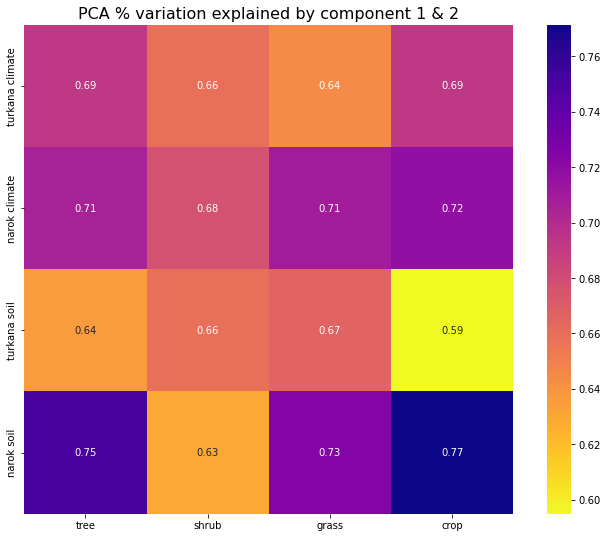

In [12]:
# Plot all of the variance explained by first and second components
scores = []
all_keys = list(df_explained_var_ratio.keys())
subsets = ["turkana_clim", "narok_clim", "turkana_soil", "narok_soil"]
for s in subsets:
    subset_scores = []
    keys = [key for key in all_keys if s in key]
    for key in keys: 
        var_1_and_2 = df_explained_var_ratio[key][0] +  df_explained_var_ratio[key][1]
        subset_scores.append(var_1_and_2)
    scores.append(subset_scores)
    
# create regression score heatmap
RdYlGn = matplotlib.cm.get_cmap("RdYlGn")
plasma = matplotlib.cm.get_cmap("plasma_r")
Yaxes = ['turkana climate', 'narok climate', 'turkana soil', 'narok soil']
Xaxes = ["tree", "shrub", "grass", "crop"]

plt.subplots(figsize=(12,9))
sns.heatmap(scores, annot = True, xticklabels = Xaxes, yticklabels = Yaxes, square=True, cmap = plasma)
plt.title("PCA % variation explained by component 1 & 2", fontsize = 16);
file_path = "F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\PCA_var_explained_by_1_2.jpg"
plt.savefig(file_path)

## Clustering with PCA components

In [15]:
# concatenate projected PCA dfs for clim and soil 
clim_soil_pca_df = {}
for df in ["turkana", "narok"]: 
    for lulc in ["tree", "shrub", "grass", "crop"]: 
        clim_soil = [k for k in projected_dfs.keys() if df in k and lulc in k]
        merged = np.concatenate((projected_dfs[clim_soil[0]][:, :2], projected_dfs[clim_soil[1]][:, :2]), axis=1)
        name = df + "_" + lulc
        clim_soil_pca_df[name] = merged

In [14]:
# train kmeans clustering on clim and soil pcas
for key in clim_soil_pca_df.keys():
    output = "F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\K-means_performance_" + key + ".jpg"
    pca_df = clim_soil_pca_df[key]
    # Simple k-means clustering 
    WCSS = []
    for i in range(1,21): 
        kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
        kmeans_pca.fit(pca_df)
        WCSS.append(kmeans_pca.inertia_)

    # plot 
    plt.figure(figsize = (10,8))
    plt.plot(range(1,21), WCSS, marker = "o", linestyle = '--')
    plt.xlabel("number of clusters")
    plt.ylabel("WCSS")
    plt.title("K-Means with PCA clustering " + key)
    plt.savefig(output)
    plt.close()

C:\Users\colorado\.conda\envs\earth-analytics-python\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\colorado\.conda\envs\earth-analytics-python\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=20.
  warnings.warn(


In [16]:
final_dfs = {}
for key in clim_soil_pca_df.keys(): 
    # pull original dataframe
    og_df = [df for df in full_lulc_dfs if df.name == key][0]
    # new dataframe name 
    new_df_name = key + "_PCA_clusters"
    # pull pca dataframe 
    pca_df = clim_soil_pca_df[key]
    # complete clusters 
    kmeans_pca = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
    kmeans_pca.fit(pca_df)
    # append original dataframe with PCA components 
    df_w_kmeans = pd.concat([og_df.reset_index(drop = True), pd.DataFrame(pca_df)], axis = 1)
    df_w_kmeans.columns.values[-4:] = ["c1", "c2", "c3", "c4"]
    # add cluster label 
    df_w_kmeans["k_mean_cluster"] = kmeans_pca.labels_
    df_w_kmeans.name = new_df_name
    final_dfs[df_w_kmeans.name] = df_w_kmeans
    print (key, " done.")

turkana_tree  done.
turkana_shrub  done.
turkana_grass  done.
turkana_crop  done.
narok_tree  done.
narok_shrub  done.
narok_grass  done.
narok_crop  done.


In [44]:
# plot data
for key in final_dfs.keys(): 
    title = key.replace("_", " ")
    plt.figure(figsize = (10,8))
    plt.scatter(final_dfs[key]["c1"], final_dfs[key]["c2"],
            c=final_dfs[key]["k_mean_cluster"], edgecolor='none', alpha=0.5,)
    plt.title(title)
    plt.xlabel('Component 1 - climate')
    plt.ylabel('Component 2 - climate')
    plt.savefig("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\K_clusters_clim_" + key + ".jpg")
    plt.close()
    
    title = key.replace("_", " ")
    plt.figure(figsize = (10,8))
    plt.scatter(final_dfs[key]["c3"], final_dfs[key]["c4"],
            c=final_dfs[key]["k_mean_cluster"], edgecolor='none', alpha=0.5,)
    plt.title(title)
    plt.xlabel('Component 1 - soil')
    plt.ylabel('Component 2 - soil')
    plt.savefig("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\K_clusters_soil_" + key + ".jpg")
    plt.close()

In [89]:
# plot data
for key in final_dfs.keys(): 
    title = key.replace("_", " ") 
    plt.figure(figsize = (10,8))
    plt.scatter(final_dfs[key]["c1"], final_dfs[key]["c2"],
            c=final_dfs[key]["k_mean_cluster"], edgecolor='none', alpha=0.5,)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.savefig("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\K_clusters_clim+soil_" + key + ".jpg")
    plt.close()

## Explore Clusters

In [19]:
def plot_histogram(data, variable):
    df = data
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    axs[0, 0].hist(df[df["k_mean_cluster"] == 0][variable])
    axs[0, 0].set_title('Cluster 0')
    axs[0, 1].hist(df[df["k_mean_cluster"] == 1][variable])
    axs[0, 1].set_title('Cluster 1')
    axs[1, 0].hist(df[df["k_mean_cluster"] == 2][variable])
    axs[1, 0].set_title('Cluster 2')
    axs[1, 1].hist(df[df["k_mean_cluster"] == 3][variable])
    axs[1, 1].set_title('Cluster 3')

    for ax in axs.flat:
        ax.set(xlabel= variable.replace("_", " "), ylabel='frequency')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    plt.savefig("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\Cluster_Discovery\\" + variable + "histogram.jpg")
    plt.close()

In [20]:
plot_histogram(final_dfs["narok_grass_PCA_clusters"], "mean_NDVI")

In [138]:
def monthly_means(df):
    # THIS DOESNT WORK 
    # pull NDVI columns by month 
    jan = [col for col in df.columns if col[4:6] == "01" and "NDVImzs" in col]
    feb = [col for col in df.columns if col[4:6] == "02" and "NDVImzs" in col]
    mar = [col for col in df.columns if col[4:6] == "03" and "NDVImzs" in col]
    apr = [col for col in df.columns if col[4:6] == "04" and "NDVImzs" in col]
    may = [col for col in df.columns if col[4:6] == "05" and "NDVImzs" in col]
    jun = [col for col in df.columns if col[4:6] == "06" and "NDVImzs" in col]
    jul = [col for col in df.columns if col[4:6] == "07" and "NDVImzs" in col]
    aug = [col for col in df.columns if col[4:6] == "08" and "NDVImzs" in col]
    sep = [col for col in df.columns if col[4:6] == "09" and "NDVImzs" in col]
    oc = [col for col in df.columns if col[4:6] == "10" and "NDVImzs" in col]
    nov = [col for col in df.columns if col[4:6] == "11" and "NDVImzs" in col]
    dec = [col for col in df.columns if col[4:6] == "12" and "NDVImzs" in col]

    # get means over each month, over all rows
    monthly_means = []
    monthly_means.append(df[jan].mean(axis = 1).mean())
    monthly_means.append(df[feb].mean(axis = 1).mean())
    monthly_means.append(df[mar].mean(axis = 1).mean())
    monthly_means.append(df[apr].mean(axis = 1).mean())
    monthly_means.append(df[may].mean(axis = 1).mean())
    monthly_means.append(df[jun].mean(axis = 1).mean())
    monthly_means.append(df[jul].mean(axis = 1).mean())
    monthly_means.append(df[aug].mean(axis = 1).mean())
    monthly_means.append(df[sep].mean(axis = 1).mean())
    monthly_means.append(df[oc].mean(axis = 1).mean())
    monthly_means.append(df[nov].mean(axis = 1).mean())
    monthly_means.append(df[dec].mean(axis = 1).mean())
    
    return(monthly_means)

In [22]:
# plot the mean z score among all points for each month from 2014-2021
def plot_z_scores_by_month(key,m):
    big_df = final_dfs[key]
    month = m

    c1 = big_df[big_df["k_mean_cluster"] == 0]
    c2 = big_df[big_df["k_mean_cluster"] == 1]
    c3 = big_df[big_df["k_mean_cluster"] == 2]
    c4 = big_df[big_df["k_mean_cluster"] == 3]

    clusters = [c1, c2, c3, c4]
    z_data = []
    for cluster in clusters:
        df = cluster
        cols = [col for col in df.columns if col[4:6] == month and "NDVImzs" in col]
        for c in cols: 
            data_list = df[c].tolist()
            cleanedList = [x for x in data_list if x != 'nan']
            z_data.append(cleanedList)
    fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex = True, sharey = True)
    axs[0, 0].hist(z_data[0], bins = 20)
    axs[0, 0].set_title('Cluster 0')
    axs[0, 1].hist(z_data[1], bins = 20)
    axs[0, 1].set_title('Cluster 1')
    axs[1, 0].hist(z_data[2], bins = 20)
    axs[1, 0].set_title('Cluster 2')
    axs[1, 1].hist(z_data[3], bins = 20)
    axs[1, 1].set_title('z_data 3')

    for ax in axs.flat:
        ax.set(xlabel= 'z score', ylabel='frequency')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()   
    plt.savefig("F:\\Tara_Fall_2019\\Kenya_Drought\\Kenya_Envirotyping\\FIGURES\\Cluster_Discovery\\" + key + m + ".jpg")

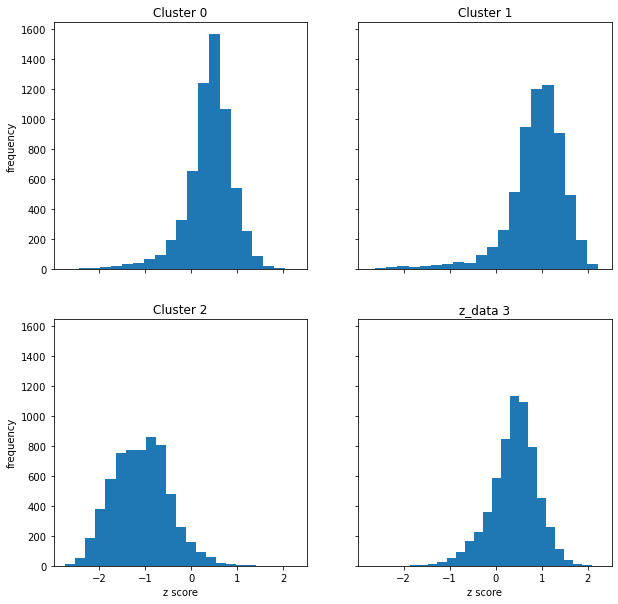

In [28]:
plot_z_scores_by_month("narok_grass_PCA_clusters", "10")

C:\Users\colorado\.conda\envs\earth-analytics-python\lib\site-packages\matplotlib\axes\_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\colorado\.conda\envs\earth-analytics-python\lib\site-packages\matplotlib\axes\_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

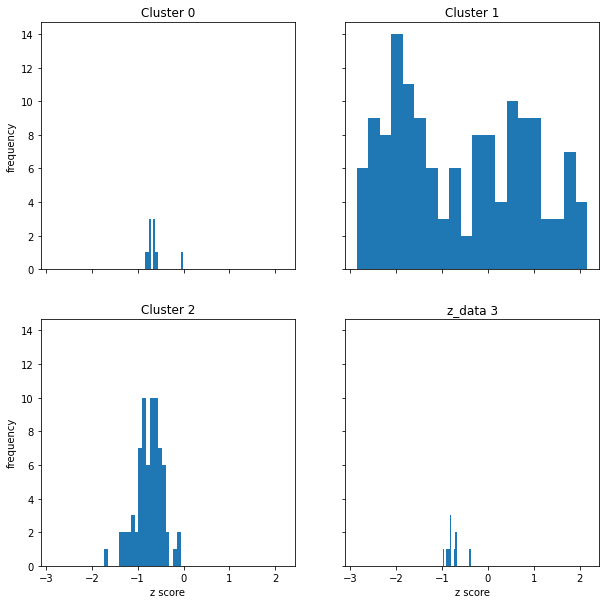

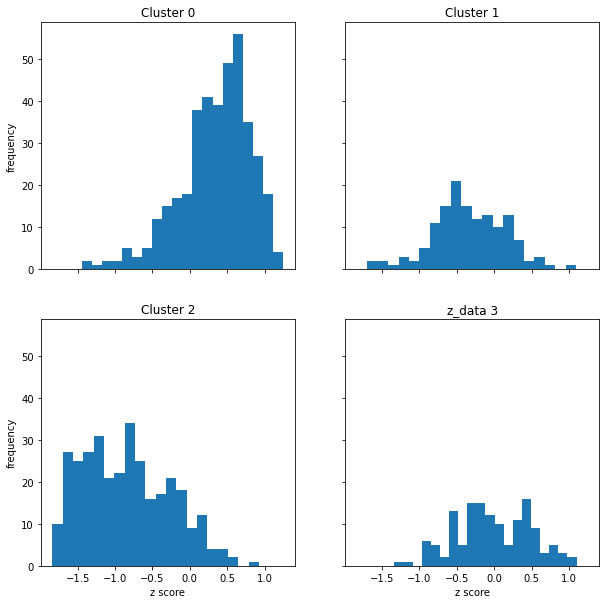

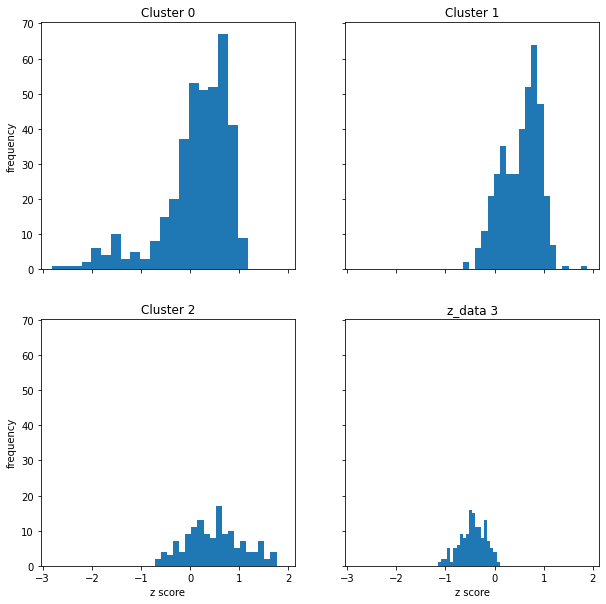

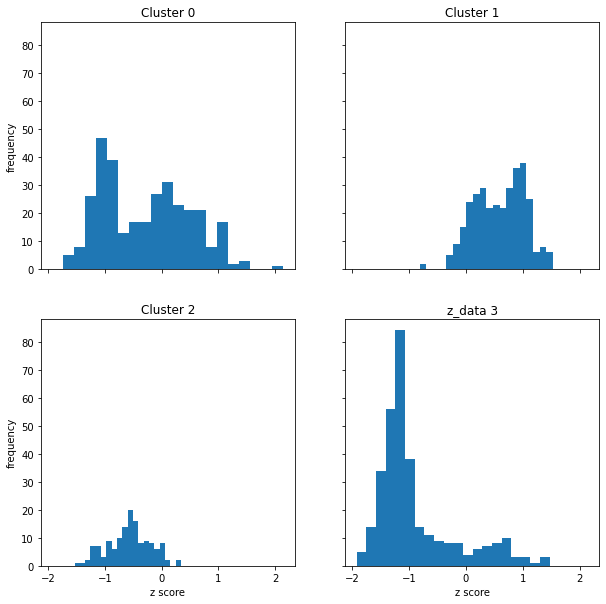

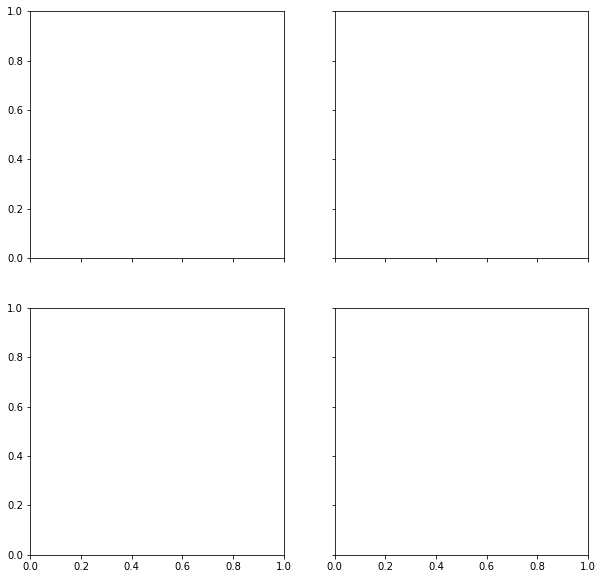

In [170]:
for key in final_dfs.keys():
    df = final_dfs[key]
    NDVI_cols = [col for col in df.columns if "NDVI" in col]
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    # plot histogram of NDVI mean for each subgroup
    plot_histogram(df, "mean_NDVI")
    # plot histogram of NDVI stdv for each subgroup
    plot_histogram(df, "stdv_NDVI")
    
    for m in months: 
        plot_z_scores_by_month(key, m)
    
    # plot each subgroup X vs Y scatter plots for a bunch of variables 
    
    # plot histogram of soil content 
    
    # plot histogram of cumulative rainfall 
    
    # plot temperature miinimums and maximums 
    